## Introduction

This Notebook will implement a deep learning model for the Titanic Survival Classification problem from scratch!

In [487]:
import torch
import numpy as np
import pandas as pd

## Clean data

In [488]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [489]:
# Shows the number of missing values in each feature
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We currently have missing values for the Age, Cabin, and Embarked. So we are going to fill those values using the mode of the feature.

In [490]:
# Passes the mode of each feature
modes = data.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [491]:
# Fill those missing values
data.fillna(modes, inplace=True)

In [492]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Feature Engineering

In [493]:
data.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

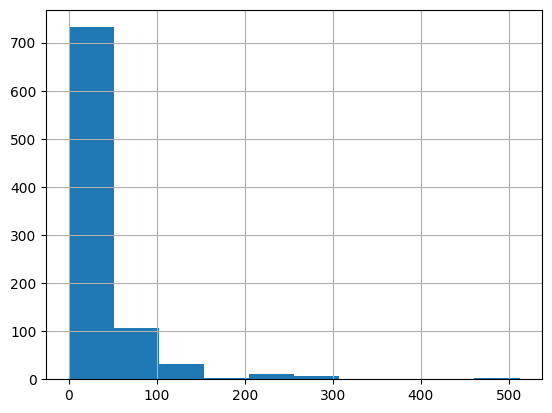

In [494]:
data["Fare"].hist()

The Fare Feature is a long tailed distribution, meaning that the majority of the occurences are at the head of the distrubition. 

It is known that these types of distributions in feature data can have negative performance effects in linear models. So I am going to take the log of the features to create an even distribution.

In [495]:
# Log of the Fare (+1 because there are some zeros inside the Fare)
data["Fare"] = np.log(data["Fare"] + 1) 

<Axes: >

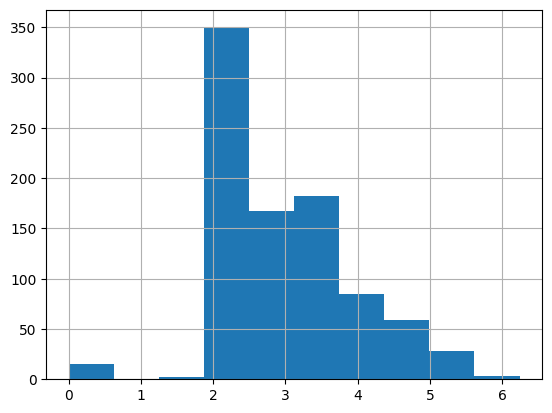

In [496]:
data["Fare"].hist()

In [497]:
data["LogFare"] = np.log(data["Fare"] + 1) 

Now we want to seperate our non-numerical features into dummy features so we can place a numerical representation on them.

We will do this by converting each features unique outputs to a feature and place a true or false value. These true or false values later convert to binary.

In [498]:
data.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [499]:
data = pd.get_dummies(data, columns=["Sex", "Pclass", "Embarked"])

In [500]:
data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [501]:
added_cols = ['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
data[added_cols].head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True,False,False,True
1,True,False,True,False,False,True,False,False
2,True,False,False,False,True,False,False,True
3,True,False,True,False,False,False,False,True
4,False,True,False,False,True,False,False,True


## Converting to Tensors

In [502]:
from torch import tensor

In [503]:
# Create our dependent variable
t_dep = tensor(data.Survived)

In [504]:
data.dtypes

PassengerId      int64
Survived         int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
LogFare        float64
Sex_female        bool
Sex_male          bool
Pclass_1          bool
Pclass_2          bool
Pclass_3          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
dtype: object

In [505]:
# Create our independent variables
indep_cols = ["Age", "SibSp", "Parch", "LogFare"] + added_cols
indep_cols

['Age',
 'SibSp',
 'Parch',
 'LogFare',
 'Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [506]:
data[indep_cols].values

array([[22.0, 1, 0, ..., False, False, True],
       [38.0, 1, 0, ..., True, False, False],
       [26.0, 0, 0, ..., False, False, True],
       ...,
       [24.0, 1, 2, ..., False, False, True],
       [26.0, 0, 0, ..., True, False, False],
       [32.0, 0, 0, ..., False, True, False]], dtype=object)

In [507]:
# Tensors are unable to convert a dtype object so we have to convert this to have homogenous values
t_indep_arr = np.array(data[indep_cols].values, dtype=float)
t_indep = torch.tensor(t_indep_arr)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]], dtype=torch.float64)

In [508]:
t_indep.shape

torch.Size([891, 12])

## Creating the model

First we need to initialize the parameter tensors. Each value inside this tensor corellates to the parameter of each feature that will be adjusted through backpropogation.  

In [509]:
n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5 # More even distribution between -0.5 and 0.5 rather than 0 to 1
coeffs

tensor([ 0.0475,  0.1757, -0.2910,  0.4944, -0.4225, -0.4774,  0.3277,  0.3220,
         0.4963,  0.2614,  0.0395,  0.3586])

Notice there is one value for each feature.

### Normalizing the Features

In [510]:
# Matrix and Vector Multiply using brodcasting
# Multiplying each row of t_indep by the vector coeffs
t_indep*coeffs

tensor([[ 1.0446,  0.1757, -0.0000,  ...,  0.0000,  0.0000,  0.3586],
        [ 1.8043,  0.1757, -0.0000,  ...,  0.2614,  0.0000,  0.0000],
        [ 1.2345,  0.0000, -0.0000,  ...,  0.0000,  0.0000,  0.3586],
        ...,
        [ 1.1396,  0.1757, -0.5820,  ...,  0.0000,  0.0000,  0.3586],
        [ 1.2345,  0.0000, -0.0000,  ...,  0.2614,  0.0000,  0.0000],
        [ 1.5194,  0.0000, -0.0000,  ...,  0.0000,  0.0395,  0.0000]],
       dtype=torch.float64)

Notice how some of the values are larger than the others. Specifically the first column "Age" is larger than the others because we didn't normalize it. So we are going to normalize the values by taking dividing by the max value of the feature.

In [511]:
vals, indicies = t_indep.max(dim=0)
vals

tensor([80.0000,  8.0000,  6.0000,  1.9797,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000], dtype=torch.float64)

In [512]:
t_indep = t_indep / vals

In [513]:
t_indep

tensor([[0.2750, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.3000, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.3250, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]],
       dtype=torch.float64)

### Understanding t_indep*coeffs

In [514]:
print(t_indep.shape)
print(coeffs.shape)

torch.Size([891, 12])
torch.Size([12])


Each row inside of `t_indep` can be described as the input vector that contains `n` features.

Each value inside the `coeffs` is the parameter for each feature. It will have a size of `n`. This is also known as the "weights".

We will element wise multiply each feature in each row of `t_indep` by the respective parameter inside of `coeff`. 

This will result in a tensor `preds` of the same size as the original `t_indep` where each row contains the features multiplied by their respective weight.

In [515]:
# Now the predictions are going to be the procuct of the input matrix and the parameter vector
preds = (t_indep*coeffs)
preds.shape

torch.Size([891, 12])

Now based on the architecture of neural networks, the neuron is the sum of the all the features by their respective weight (and a bias, but i haven't added a bias in this network). Therefore, we just get the sum of the features for each row. That's why we sum across "1" because that means row wise sum.

In [516]:
preds = preds.sum(axis=1)
preds.shape

torch.Size([891])

We now have a resulting array that is 891, which is the number of rows that we originally had. The reason why is because we caluclated the prediction of that data row by taking the sum of the features inside of `preds`.

In [517]:
preds[:10]

tensor([0.6959, 0.6267, 0.7375, 0.7080, 0.6890, 0.3667, 0.6413, 0.7482, 0.6640,
        0.5632], dtype=torch.float64)

The predictions aren't great but that's because we havent gone through any training. At most, these are just random values multiplied and summed together.

### Loss

We now have to calulate how good those predictions are by caulcating the loss. We will use the Mean Absolute Value Loss. This means that we take the difference between the prediction and actual value and take the absolute value and mean of them.

In [518]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5312, dtype=torch.float64)

So now that we have derived ability to calculate predictions and calculate loss. Let's make some functions for them.

### Calculate Predictions and Loss

In [519]:
# Calculate preds by taking the product of the features vector and weights then row sum 
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
    
# Calculate the loss by taking the mean absolute difference between the predictions and actual values 
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

## Gradient Descent

Because we want adjust the weights of the network, we want to calulate the derivatives of the `coeffs` because they contain our weights. We do this by using `requires_grad_()` which tells pytorch to calculate gradients for the `coeffs`.

In [520]:
coeffs.requires_grad_()

tensor([ 0.0475,  0.1757, -0.2910,  0.4944, -0.4225, -0.4774,  0.3277,  0.3220,
         0.4963,  0.2614,  0.0395,  0.3586], requires_grad=True)

In [521]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5312, dtype=torch.float64, grad_fn=<MeanBackward0>)

Now in the loss, we have a `grad_fn` which is the gradient function to calculate the gradients of each weight.

In [522]:
loss.backward()

We can calcualte the gradient by calling the `.backward()` function 

In [523]:
coeffs.grad

tensor([ 0.0914,  0.0199,  0.0041,  0.1171, -0.1706,  0.4029, -0.0629,  0.0112,
         0.2840, -0.0202,  0.0191,  0.2334])

As you can see now, we now have the gradients for each weight in `coeffs`. The greater the value means that weight has more of an affect on the loss.

For example: `coeffs.grad[0] = -0.0940` means that if we increase this weight, it will decrease the loss and vice versa

### Backpropogation

So now we want to adjust the weights inside of `coeffs` based on the gradients inside of `coeffs.grad`.

The way we do that is to subtract the original weight by the gradient. 

We want to be careful not to overjump down the gradient of the loss so we are going to multiply each gradient by a `learning rate`.

In [524]:
# One step 
with torch.no_grad():
    coeffs.sub_(coeffs.grad*0.1)
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4958, dtype=torch.float64)


Notice our loss has gone down from `0.5249` to `0.4967`

## Training the linear model

We need to seperate the training and validation set. I am going to use FastAI for this. I am also going to randomly split the data. For this data, it won't be a big deal. Thought it is dangerous to randomly split data for validation sets.

In [525]:
from fastai.data.transforms import RandomSplitter
trn_split, val_split = RandomSplitter()(data)

In [526]:
val_split

(#178) [323,508,783,738,68,715,546,167,156,658...]

In [527]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(trn_indep), len(val_indep)

(713, 178)

Now we have our data, we want to write some more functions for the rest of the training loop based on our previous derivations.

In [528]:
# Calculate the coefficients by subtracting the product of the gradients by a learning rate 
def update_coeffs(coeffs, lr): coeffs.sub_(coeffs.grad * lr)

In [529]:
# One epoch of a training loop requries calculating the loss, calcuating the gradients, then updating the weights by the loss
def one_epoch(epoch, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): 
        update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [530]:
# Return a tensor of the number of weights based on a random distribution between -0.5 and 0.5
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [531]:
def train_model(epochs=30, lr=0.01):
    coeffs = init_coeffs()
    for i in range(epochs): 
        one_epoch(coeffs, lr=lr)
    return coeffs

In [532]:
coeffs = train_model(18, lr=0.02)

0.496; 0.482; 0.461; 0.434; 0.401; 0.365; 0.330; 0.344; 0.392; 0.425; 0.436; 0.423; 0.395; 0.363; 0.341; 0.337; 0.355; 0.410; 

Now we have a weights that result in a loss at `0.322`

In [533]:
def show_coeffs(): return dict(zip(indep_cols, coeffs))
show_coeffs()

{'Age': tensor(-0.2957, grad_fn=<UnbindBackward0>),
 'SibSp': tensor(0.0721, grad_fn=<UnbindBackward0>),
 'Parch': tensor(-0.2245, grad_fn=<UnbindBackward0>),
 'LogFare': tensor(-0.1420, grad_fn=<UnbindBackward0>),
 'Sex_female': tensor(0.2128, grad_fn=<UnbindBackward0>),
 'Sex_male': tensor(0.3099, grad_fn=<UnbindBackward0>),
 'Pclass_1': tensor(0.1911, grad_fn=<UnbindBackward0>),
 'Pclass_2': tensor(-0.2124, grad_fn=<UnbindBackward0>),
 'Pclass_3': tensor(0.0704, grad_fn=<UnbindBackward0>),
 'Embarked_C': tensor(0.2759, grad_fn=<UnbindBackward0>),
 'Embarked_Q': tensor(0.0249, grad_fn=<UnbindBackward0>),
 'Embarked_S': tensor(0.2550, grad_fn=<UnbindBackward0>)}

By the data, it shows that females had more of a chance of surviving than males, the higher your age the more likely you are to not surviving, etc.


### Measuring Accuracy

In [534]:
preds = calc_preds(coeffs, val_indep)

In [535]:
# Calculate the number of predictions we got correct (assuming > 0.5 means survived)
results = val_dep.bool()==(preds>0.5)
results[:10]

tensor([False,  True,  True,  True, False,  True, False,  True, False,  True])

In [536]:
results.float().mean()

tensor(0.6067)

In [537]:
def acc(coeffs): return (train_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()

In [538]:
acc(coeffs)

tensor(0.6017)

### Using Sigmoids

In [539]:
preds[:10]

tensor([0.0393, 0.4295, 0.3778, 0.4634, 0.3533, 0.4825, 0.0896, 0.1255, 0.1662,
        0.1747], dtype=torch.float64, grad_fn=<SliceBackward0>)

Notice that some of our values are negative. We can use the sigmoid function to squish the value between 0 and 1.

In [540]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [541]:
coeffs = train_model(lr=0.2)

0.525; 0.521; 0.513; 0.501; 0.485; 0.464; 0.441; 0.415; 0.391; 0.369; 0.350; 0.335; 0.324; 0.315; 0.308; 0.302; 0.297; 0.292; 0.287; 0.282; 0.277; 0.272; 0.267; 0.261; 0.256; 0.250; 0.244; 0.239; 0.234; 0.229; 

In [542]:
acc(coeffs)

tensor(0.6452)

This time we trained the model with a final sigmoid neuron.

## Using matrix product

Our previous implementation `val_indeps*coeffs` utilized a vector of weights to do the matrix vector product. This inherently means that there is only one layer. If we want to add multiple layers, we need to convert the coeffs into a matrix. This requires the matrix product using `val_indeps@coeffs`.

This means we need to change how we are calculating our predictions.

In [543]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [544]:
# Create a matrix of (n_coeff, 1), in order to do matmul, the dtypes must be the same
def init_coeffs(): return (torch.rand(n_coeff, 1, dtype=torch.float64)*0.01).requires_grad_()

In [545]:
# Convert our dependent variables vectors into matrices
trn_dep = trn_dep[:, None]
val_dep = val_dep[:, None]

In [546]:
trn_dep.shape

torch.Size([713, 1])

In [547]:
coeffs = init_coeffs()
coeffs[0].dtype

torch.float64

In [548]:
coeffs = train_model(lr=2)

0.501; 0.459; 0.392; 0.340; 0.312; 0.292; 0.273; 0.253; 0.234; 0.221; 0.213; 0.210; 0.208; 0.208; 0.209; 0.209; 0.210; 0.210; 0.211; 0.211; 0.210; 0.209; 0.208; 0.207; 0.206; 0.204; 0.202; 0.201; 0.200; 0.199; 

In [549]:
coeffs

tensor([[0.0013],
        [0.0053],
        [0.0013],
        [0.0078],
        [0.0028],
        [0.0040],
        [0.0098],
        [0.0027],
        [0.0054],
        [0.0061],
        [0.0024],
        [0.0040]], dtype=torch.float64, requires_grad=True)

In [550]:
acc(coeffs)

tensor(0.3857)

## Neural Network

Now we are going to scale up the number of hidden layer neurons to create a neural network.

In [551]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden, dtype=torch.float64)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1, dtype=torch.float64)-0.3
    const = torch.rand(1, dtype=torch.float64)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

`Layer 1` is the hidden layer where the the shape is (number of features, number of hidden layers). We subtract 0.5 and divide by n_hidden in order to normalize the weights.

`Layer 2` converts the hidden layers to an singular output

`Const` is a constant that we add.

In [552]:
coeffs = init_coeffs()
l1, l2, const = coeffs
print(const.shape)

torch.Size([])


In [553]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1, l2, const = coeffs
    res = F.relu(indeps@l1) # Takes the Relu of the outputs of the matmul
    res = res@l2 + const # Converts to a singular output and adds the const
    return torch.sigmoid(res) # Takes the sigmoid

In [554]:
def update_coeffs(coeffs, lr):
    for layer in coeffs: layer.sub_(layer.grad * lr)

In [555]:
coeffs = train_model(lr=1.4)

0.529; 0.515; 0.499; 0.471; 0.427; 0.368; 0.304; 0.255; 0.229; 0.220; 0.217; 0.213; 0.206; 0.200; 0.198; 0.199; 0.199; 0.198; 0.197; 0.196; 0.196; 0.196; 0.196; 0.196; 0.196; 0.196; 0.196; 0.196; 0.196; 0.196; 

In [556]:
acc(coeffs)

tensor(0.3857)

## Deep Learning

We are now going to add more hidden layers to the neural network.

In [673]:
def init_coeffs():
    # 10 hidden layers, 10 neurons each
    hiddens = [10, 10]
    
    # list of neurons in each layer [12, 10, 10, 1]
    sizes = [n_coeff] + hiddens + [1] 
    n = len(sizes)
    
    # Create the tensors parameters for each layer using the shape sizes [12,10] [10,10] [10,1]
    layers = [(torch.rand(sizes[i], sizes[i+1], dtype=torch.float64)-0.3)/sizes[i+1]*4 for i in range(n-1)]
    
    # Create the constants for each layer
    consts = [(torch.rand(1, dtype=torch.float64)[0]-0.5)*0.1 for i in range(n-1)]
    
    # Add requires grad to the layers and constants
    for l in layers: l.requires_grad_()
    for l in consts: l.requires_grad_()
    
    return layers, consts

In [674]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    # Getting the layers and constants from the coeffs
    layers, consts = coeffs 
    
    # 3 layers [12,10] [10,10] [10, 1]
    n = len(layers) 
    
    # current data inputs [?, 12]
    res = indeps 
    for i, l in enumerate(layers): # for each layer
        res = res@l + consts[i] #matmul and add the constant
        if i!=n-1: # for every layer except the last, 
            res = F.relu(res) # put it through the relu
            
    return torch.sigmoid(res)  # return the sigmoid
    

In [670]:
def update_coeffs(coeffs, lr):
    layers, consts = coeffs
    for layer in layers: layer.sub_(layer.grad * lr)
    for layer in consts: layer.sub_(layer.grad * lr)        

In [671]:
coeffs = train_model(lr=1.4)

0.606; 0.521; 0.495; 0.485; 0.472; 0.455; 0.438; 0.422; 0.410; 0.401; 0.395; 0.391; 0.389; 0.387; 0.387; 0.386; 0.386; 0.386; 0.386; 0.386; 0.386; 0.386; 0.386; 0.386; 0.386; 0.386; 0.386; 0.386; 0.386; 0.386; 

In [672]:
acc(coeffs)

tensor(0.3857)

## Conclusions

I learned alot from building this neural network from scratch using mostly numpy and basic pytorch functionality. There were lots of ups and downs with getting it to work. I really tried to dive deep and understand how the matrix multiply worked between each layer and why we use it.

It's a from "scratch" model, but we didn't implement backpropogation. I cheated a bit using the pytorch `backward` and `requires_gradient`. But the understanding of backpropogation and how it works is enough for me. Each backward function is connected to the previous layer and the backpropogation is chained backward from the output back to the first layer and we use the `.grad` to update the parameters.

With that being said, the accuracy is a bit finicky. Despite our loss going down in the training data, the validation accuracy was still low. This could be a sign of overfitting to the training data. This also could be how we set up the initial weights in the `coeffs`. We used `torch.rand` and try to normalize using the coeff shapes, but the values may still need to played around with more. 

A possible addition to the network could be to ensamble multiple neural networks together and take the mean of the data.

For a problem like this, the model doesn't perform any better than a normal linear model or other models such as Random Forests, but it was a good experience to build it from the ground up.